In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
events_data = pd.read_csv('datasets/df_concat6.csv')
events_data.head()

,Month,Area Affected,NERC Region,Event Type,Demand Loss (MW),Number of Customers Affected,Year,Date/Time Event Began,Date/Time Restoration,Event Duration (hours)
0,January,Washington,WECC,System Operations,0.0,NaN,2019,2019-01-05 13:19:00,2019-01-05 15:07:00,1.80
1,January,Washington,WECC,Severe Weather,230.0,230000.0,2019,2019-01-06 03:00:00,2019-01-09 07:00:00,4.00
2,January,California,WECC,Severe Weather,300.0,90382.0,2019,2019-01-06 17:56:00,2019-01-06 21:52:00,3.93
3,January,Washington,WECC,Severe Weather,NaN,230000.0,2019,2019-01-06 01:00:00,2019-01-06 12:00:00,11.00
4,January,Michigan,RF,System Operations,0.0,0.0,2019,2019-01-07 20:57:00,2019-01-07 21:32:00,0.58


### How many electric disturbances occurred in the U.S. from 2019 to 2022?

In [3]:
print(f'{events_data.shape[0]} events were recorded.')

1438 events were recorded.


### What was the number of events per year?

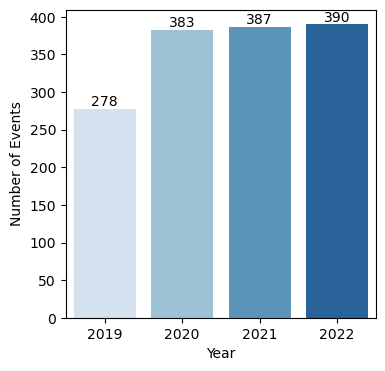

In [16]:
# creating a list with number of events per year
number_events_year = []

# range of years
years = range(2019, 2023, 1)

# filtering the number of events by year
for i in years:
    result = events_data.query('Year == @i')
    number_events_year.append(result.shape[0])

# creating a dataframe with number of events and year variables
df = pd.DataFrame({'Number of Events':number_events_year,'Year':years})

# plotting 
fig = plt.subplots(figsize=(4,4))
ax = sns.barplot(data = df, x='Year', y='Number of Events', palette='Blues')
ax.bar_label(ax.containers[0])# this line shows the values
plt.show()

### What was the number of electric disturbances by month each year?

In [66]:
#each_year = events_data.groupby(['Year']).count()
events_each_month = events_data.groupby(['Month','Year'], sort=False, as_index=False)['Area Affected'].count()

events_each_month.rename(columns={'Area Affected':'Number of Events'}, inplace=True)

events_each_month.head()

,Month,Year,Number of Events
0,January,2019,26
1,February,2019,25
2,March,2019,11
3,April,2019,27
4,May,2019,15


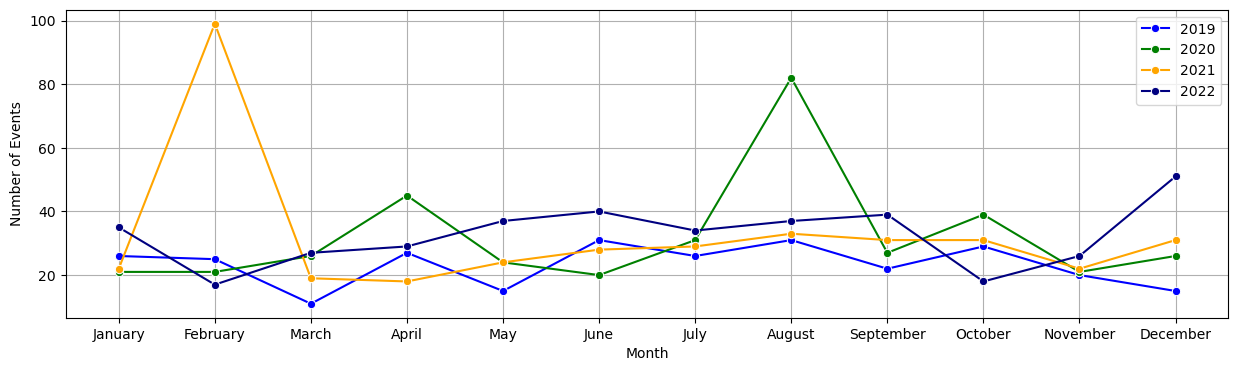

In [67]:
df_2019 = events_each_month.loc[events_each_month.loc[:,'Year'] == 2019,['Number of Events','Month']]
df_2020 = events_each_month.loc[events_each_month.loc[:,'Year'] == 2020,['Number of Events','Month']]
df_2021 = events_each_month.loc[events_each_month.loc[:,'Year'] == 2021,['Number of Events','Month']]
df_2022 = events_each_month.loc[events_each_month.loc[:,'Year'] == 2022,['Number of Events','Month']]

fig = plt.subplots(figsize=(15,4))
sns.lineplot(data=df_2019, x='Month', y= 'Number of Events', marker='o', color='blue', label='2019')
sns.lineplot(data=df_2020, x='Month', y= 'Number of Events', marker='o', color='green', label='2020')
sns.lineplot(data=df_2021, x='Month', y= 'Number of Events', marker='o', color='orange', label='2021')
sns.lineplot(data=df_2022, x='Month', y= 'Number of Events', marker='o', color='navy', label='2022')

plt.grid(True)
plt.show()


In [71]:
events_each_month_pivt = events_each_month.pivot(index='Month',columns=['Year'])['Number of Events']
events_each_month_pivt.head()

Year,2019,2020,2021,2022
Month,,,,
April,27,45,18,29
August,31,82,33,37
December,15,26,31,51
February,25,21,99,17
January,26,21,22,35


<AxesSubplot:xlabel='Year', ylabel='Month'>

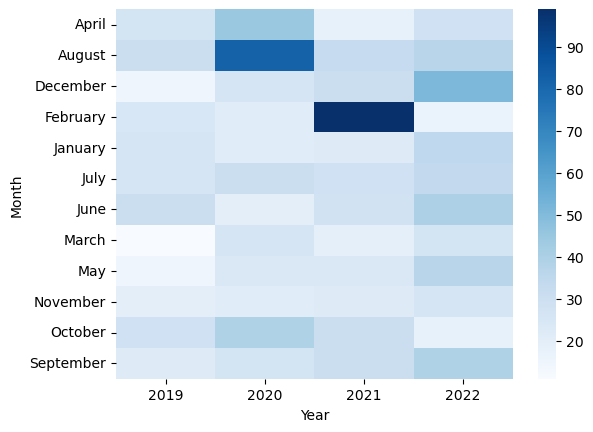

In [38]:
sns.heatmap(events_each_month_pivt, cmap='Blues')

In [ ]:
# https://realpython.com/pandas-groupby/
# https://seaborn.pydata.org/generated/seaborn.lineplot.html
# https://www.datacamp.com/tutorial/python-seaborn-line-plot-tutorial